In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel('Dataset.xlsx')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [4]:
loaitru = pd.read_excel('Dataset.xlsx', sheet_name='Return')['Order ID']
loaitru

0      CA-2017-153822
1      CA-2017-129707
2      CA-2014-152345
3      CA-2015-156440
4      US-2017-155999
            ...      
291    CA-2015-101910
292    CA-2017-156958
293    CA-2016-105585
294    CA-2016-148796
295    CA-2015-149636
Name: Order ID, Length: 296, dtype: object

In [6]:
#df = df['Order ID'].isna(loaitru)
df = df[~df['Order ID'].isin(loaitru)]
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,0.2,-0.6048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,0.2,4.8840
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,0.2,4.2717
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,0.2,-64.7748
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,0.8,-5.4870


In [33]:
lastday = datetime.datetime.strptime('2017-12-31', '%Y-%m-%d')
df['lastday-Order Date']=lastday - df['Order Date']
df['lastday-Order Date']=df['lastday-Order Date'].dt.days
df_rfm = df.groupby('Customer ID').agg({'lastday-Order Date': 'min', 'Order ID': 'count', 'Sales': 'sum'})

df_rfm

,lastday-Order Date,Order ID,Sales
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,483,17,5073.975
AB-10015,416,6,886.156
...,...,...,...
XP-21865,83,25,2110.726
YC-21895,5,7,5438.650
YS-21880,10,12,6720.444


In [34]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['r_score'] = pd.qcut(df_rfm['lastday-Order Date'], q=5, labels=r_labels)
df_rfm['f_score'] = pd.qcut(df_rfm['Order ID'], q=5, labels=f_labels)
df_rfm['m_score'] = pd.qcut(df_rfm['Sales'], q=5, labels=m_labels)
df_rfm

,lastday-Order Date,Order ID,Sales,r_score,f_score,m_score
Customer ID,,,,,,
AA-10315,185,11,5563.560,2,3,5
AA-10375,20,15,1056.390,5,4,2
AA-10480,260,12,1790.512,2,3,3
AA-10645,483,17,5073.975,1,5,5
AB-10015,416,6,886.156,1,1,2
...,...,...,...,...,...,...
XP-21865,83,25,2110.726,3,5,3
YC-21895,5,7,5438.650,5,1,5
YS-21880,10,12,6720.444,5,3,5


In [35]:
df_rfm['rfm']=df_rfm['r_score'].astype(str) + df_rfm['f_score'].astype(str) + df_rfm['m_score'].astype(str)
df_rfm

,lastday-Order Date,Order ID,Sales,r_score,f_score,m_score,rfm
Customer ID,,,,,,,
AA-10315,185,11,5563.560,2,3,5,235
AA-10375,20,15,1056.390,5,4,2,542
AA-10480,260,12,1790.512,2,3,3,233
AA-10645,483,17,5073.975,1,5,5,155
AB-10015,416,6,886.156,1,1,2,112
...,...,...,...,...,...,...,...
XP-21865,83,25,2110.726,3,5,3,353
YC-21895,5,7,5438.650,5,1,5,515
YS-21880,10,12,6720.444,5,3,5,535


In [10]:
phanloai = pd.read_excel('Dataset.xlsx', sheet_name='Sheet2')
phanloai

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [11]:
phanloai['RFM Score'] = phanloai['RFM Score'].replace(' ', '', regex=True)
phanloai

,Segment,RFM Score
0,Champions,"555,554,544,545,454,455,445"
1,Loyal,"543,444,435,355,354,345,344,335"
2,Potential Loyalist,"553,551,552,541,542,533,532,531,452,451,442,44..."
3,New Customers,"512,511,422,421412,411,311"
4,Promising,"525,524,523,522,521,515,514,513,425,424,413,41..."
5,Need Attention,"535,534,443,434,343,334,325,324"
6,About To Sleep,"331,321,312,221,213,231,241,251"
7,At Risk,"255,254,245,244,253,252,243,242,235,234,225,22..."
8,Cannot Lose Them,"155,154,144,214,215,115,114,113"
9,Hibernating customers,"332,322,233,232,223,222,132,123,122,212,211"


In [12]:
phanloai['RFM Score'] = phanloai['RFM Score'].str.split(',')
phanloai = phanloai.explode('RFM Score')
phanloai

,Segment,RFM Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [36]:
df_rfm_phanloai = df_rfm.merge(phanloai, how='left', left_on='rfm', right_on='RFM Score')
df_rfm_phanloai

#pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,lastday-Order Date,Order ID,Sales,r_score,f_score,m_score,rfm,Segment,RFM Score
0,185,11,5563.560,2,3,5,235,At Risk,235
1,20,15,1056.390,5,4,2,542,Potential Loyalist,542
2,260,12,1790.512,2,3,3,233,Hibernating customers,233
3,483,17,5073.975,1,5,5,155,Cannot Lose Them,155
4,416,6,886.156,1,1,2,112,Lost customers,112
...,...,...,...,...,...,...,...,...,...
786,83,25,2110.726,3,5,3,353,Potential Loyalist,353
787,5,7,5438.650,5,1,5,515,Promising,515
788,10,12,6720.444,5,3,5,535,Need Attention,535
789,55,27,7892.998,4,5,5,455,Champions,455


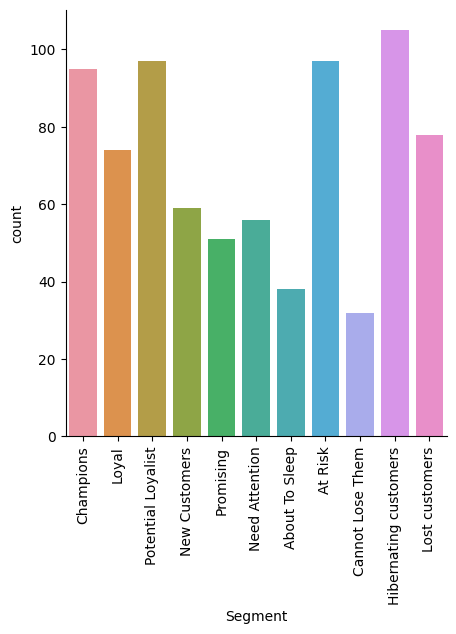

In [23]:
category_order = ['Champions',
                  'Loyal',
                  'Potential Loyalist',
                  'New Customers',
                  'Promising',
                  'Need Attention',
                  'About To Sleep',
                  'At Risk',
                  'Cannot Lose Them',
                  'Hibernating customers',
                  'Lost customers']
sns.catplot(x='Segment', data=df_rfm_phanloai, kind='count', order=category_order)
plt.xticks(rotation=90)
plt.show()

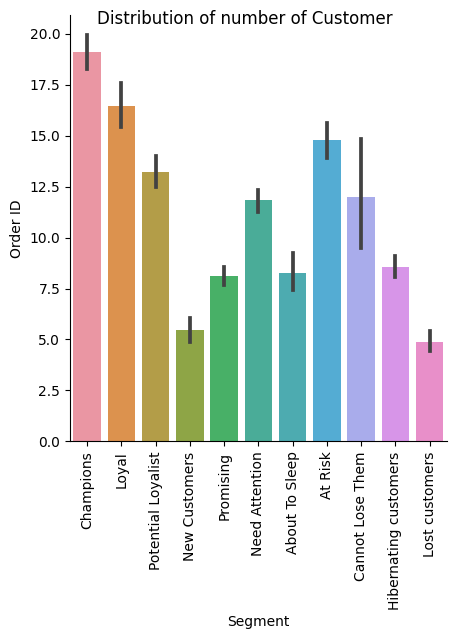

In [39]:
plot = sns.catplot(x='Segment', y = 'Order ID', data=df_rfm_phanloai, kind='bar',order=category_order)
plt.xticks(rotation=90)
plot.fig.suptitle('Distribution of number of Customer')
plt.show()

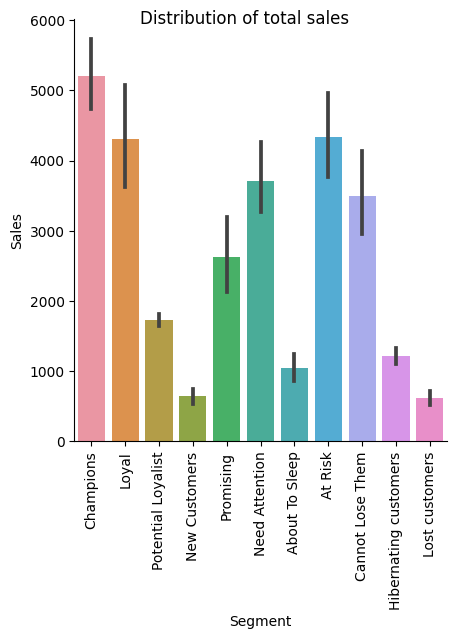

In [40]:
plot = sns.catplot(x='Segment', y = 'Sales', data=df_rfm_phanloai, kind='bar',order=category_order)
plt.xticks(rotation=90)
plot.fig.suptitle('Distribution of total sales')
plt.show()

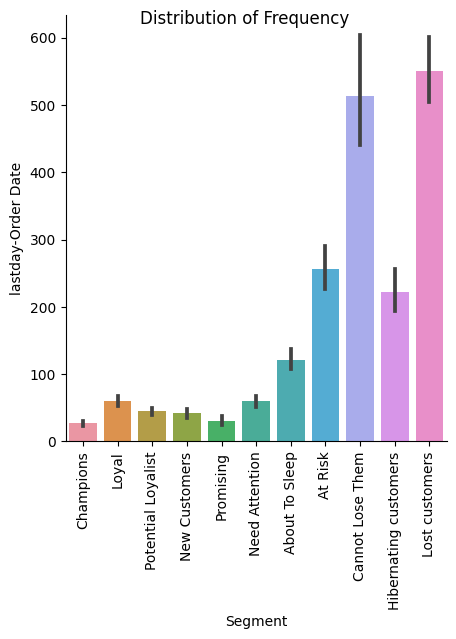

In [41]:
plot = sns.catplot(x='Segment', y = 'lastday-Order Date', data=df_rfm_phanloai, kind='bar',order=category_order)
plt.xticks(rotation=90)
plot.fig.suptitle('Distribution of Frequency')
plt.show()

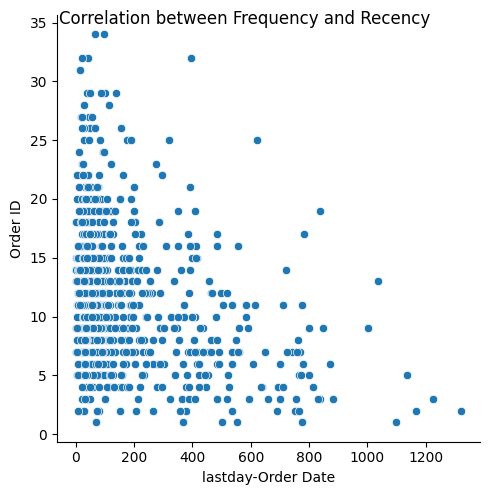

In [45]:
plot = sns.relplot(x='lastday-Order Date', y = 'Order ID', data = df_rfm_phanloai, kind = 'scatter')
plot.fig.suptitle('Correlation between Frequency and Recency')
plt.show()

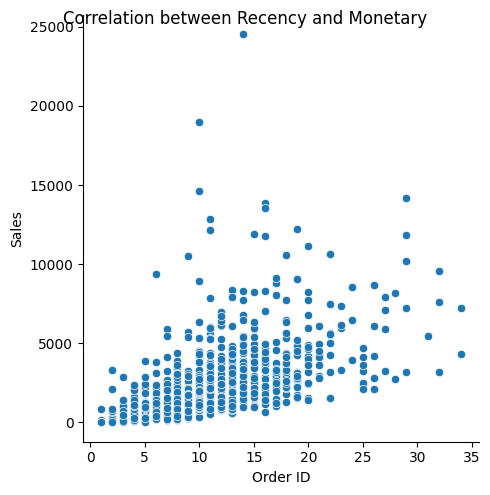

In [46]:
plot = sns.relplot(x='Order ID', y = 'Sales', data = df_rfm_phanloai, kind = 'scatter')
plot.fig.suptitle('Correlation between Recency and Monetary')
plt.show()

In [ ]:
#Suggestions for Marketing team
# Champions - Reward them. Ask them for reviews. They can be early adopters for new products.

# Loyal  - Up-sell higher value products. Ask for reviews. Ask for referrals, Engage with them; send them free gifts, pizzas, hand-written cards etc.

# Potential Loyalist - Offer subscription and loyalty programs. Provide recommendations. Ask for reviews. Send gifts, handwritten cards, etc. Make one-on-one personalized phone calls.

# New Customers - Provide post-sale support. Give them early success, offer free gift cards. Start a one-on-one relationship.

# Promising - Provide pre-sale support. Start building a relationship. Learn their wants/needs.

# Need Attention - Reach out personally and provide proactive support. Learn about them and build a relationship.

# About To Sleep - Reach out personally through email or SMS to revive interest. Learn about their passion/problem.

# At Risk - Make limited time offers. Recommend new products or services based on past purchases. Try to re-sell or cross-sell.

# Cannot Lose Them - Win back through special offers. Talk to them, survey them, don't lose them to competitors.

# Hibernating customers - Send personal emails and messages to reconnect. Provide helpful resources.

# Lost customers - Try to revive interest with reach-out campaign, otherwise ignore.

####Dựa theo mục tiêu của chiến dịch marketing là tri ân khách hàng đã ủng hộ đến công ty cũng như khai thác khách hàng tiềm năng trở thành khách hàng trung thành. Đề xuất tập trung vào nhóm Recency và Monetary sẽ giúp tối đa hóa hiệu quả chiến dịch và nâng cao lòng trung thành của nhóm khách hàng tiềm năng